In [ ]:
import pandas
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
base_filepath = ' [filepath] '
!ls "$base_filepath"

In [ ]:
training_data = pandas.read_csv(base_filepath + '/train.csv', encoding="latin-1")

In [ ]:
test_data = pandas.read_csv(base_filepath + '/test.csv', encoding="latin-1")

In [ ]:
training_data

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [ ]:
test_data

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [ ]:
training_data['Combined'] = training_data['Title'] + ' ' + training_data['Description']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vect = CountVectorizer()

In [ ]:
count_vect.fit(training_data['Combined'])

CountVectorizer()

In [ ]:
x_count = count_vect.transform(training_data['Combined'])
# print(count_vect.get_feature_names_out())
# print(x_count.toarray())

In [ ]:
x_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3739052 stored elements and shape (120000, 64999)>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

training_data_class = training_data['Class Index']

classifier = MultinomialNB()
classifier.fit(x_count, training_data_class)

MultinomialNB()

In [ ]:
test_data['Combined'] = test_data['Title'] + ' ' + test_data['Description']

In [ ]:
count_vect_test = CountVectorizer()

In [ ]:
count_vect_test.fit(test_data['Combined'])

CountVectorizer()

In [ ]:
x_count_test = count_vect.transform(test_data['Combined'])

In [ ]:
x_count_test

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 234562 stored elements and shape (7600, 64999)>

In [ ]:
test_data_class = test_data['Class Index']

In [ ]:
classifier.score(x_count_test, test_data_class)

0.900921052631579

In [ ]:
classifier.score(x_count, training_data_class)

0.917275

In [ ]:
tfidf_vect = TfidfVectorizer()

In [ ]:
tfidf_vect.fit(training_data['Combined'])

TfidfVectorizer()

In [ ]:
x_tfidf = tfidf_vect.transform(training_data['Combined'])

In [ ]:
classifier_tfidf = MultinomialNB()
classifier_tfidf.fit(x_tfidf, training_data_class)

MultinomialNB()

In [ ]:
tfidf_vect_test = TfidfVectorizer()
tfidf_vect_test.fit(test_data['Combined'])
x_tfidf_test = tfidf_vect.transform(test_data['Combined'])

In [ ]:
classifier_tfidf.score(x_tfidf_test, test_data_class)

0.9022368421052631

In [ ]:
classifier_tfidf.score(x_tfidf, training_data_class)

0.9170416666666666

In [ ]:
from sklearn.metrics import classification_report

classifier_tfidf_y_pred = classifier_tfidf.predict(x_tfidf_test)
report = classification_report(test_data_class, classifier_tfidf_y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.91      0.89      0.90      1900
           2       0.95      0.98      0.96      1900
           3       0.87      0.86      0.86      1900
           4       0.88      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



In [ ]:
from sklearn import model_selection, preprocessing, metrics

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(training_data['Class Index'])
test_y = encoder.fit_transform(test_data['Class Index'])

print(training_data['Combined'])
print(test_y)

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996    Renteria signing a top-shelf deal Red Sox gene...
119997    Saban not going to Dolphins yet The Miami Dolp...
119998    Today's NFL games PITTSBURGH at NY GIANTS Time...
119999    Nets get Carter from Raptors INDIANAPOLIS -- A...
Name: Combined, Length: 120000, dtype: object
[2 3 3 ... 1 2 2]


In [ ]:
max_length = 0
for combined_text in training_data['Combined']:
  # Do something with combined_text
  if max_length < len(combined_text):
    max_length = len(combined_text)
max_length = 256
print(max_length)

256


In [ ]:
# word to integer IDs, documents padded to the same length

import numpy
from tensorflow.keras.preprocessing import text, sequence

# create a tokenizer
token = text.Tokenizer()
token.fit_on_texts(training_data['Combined'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(training_data['Combined']), maxlen=max_length)
test_seq_x = sequence.pad_sequences(token.texts_to_sequences(test_data['Combined']), maxlen=max_length)
train_seq_x[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
from keras.models import Sequential
from keras import layers

vocab_size = len(word_index)+1

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model.build((None, max_length)) # build the Embedding to inilizices the weight
model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))

model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_seq_x,
                    train_y,
                    epochs=10,
                    batch_size=512,
                    validation_data=(test_seq_x, test_y),
                    verbose=1)
results = model.evaluate(test_seq_x, test_y)

print(results)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 256, 50)             │       3,516,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 252, 128)            │          32,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,551,160 (13.55 MB)

 Trainable params: 3,551,160 (13.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 183s 771ms/step - acc: 0.4324 - loss: 1.2042 - val_acc: 0.8167 - val_loss: 0.5753
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 195s 743ms/step - acc: 0.8575 - loss: 0.4629 - val_acc: 0.8967 - val_loss: 0.3371
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 170s 724ms/step - acc: 0.9170 - loss: 0.2761 - val_acc: 0.9075 - val_loss: 0.2965
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 208s 753ms/step - acc: 0.9352 - loss: 0.2154 - val_acc: 0.9079 - val_loss: 0.2851
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 201s 751ms/step - acc: 0.9466 - loss: 0.1783 - val_acc: 0.9064 - val_loss: 0.2868
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 203s 756ms/step - acc: 0.9531 - loss: 0.1535 - val_acc: 0.9103 - val_loss: 0.2836
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 195s 725ms/step - acc: 0.9609 - loss: 0.1299 - val_acc: 0.9086 - val_loss: 0.2924
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 203s 733ms/step - acc: 0.9683 - loss: 0.1093 - val_acc: 0.9018 - val_loss: 0.3116
Epoch 9/10
235/235 ━━━━━

In [ ]:
import matplotlib.pyplot as plt

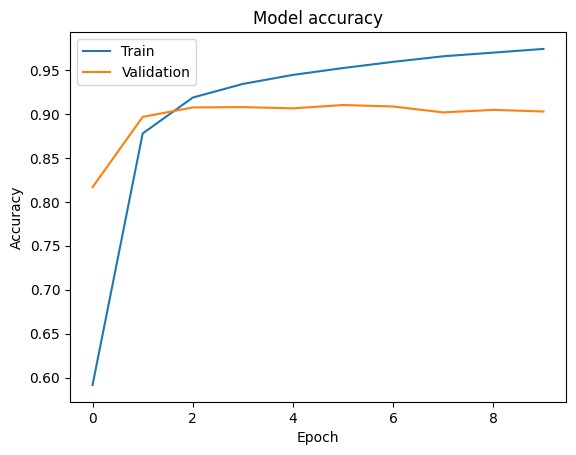

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

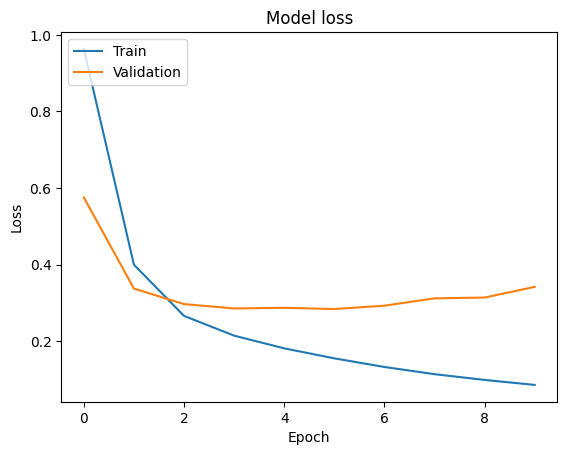

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
glove_file = base_filepath + '/glove.6B.50d.txt'

embeddings_index = {}
with open(glove_file) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = numpy.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
embeddings_index['hello']

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ], dtype=float32)

In [ ]:
import numpy as np

# create an embedding matrix
embedding_dim = 50 # dimension of GloVe embeddings
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# convert text to sequence of tokens and pad them
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(training_data['Combined']), maxlen=max_length)
test_seq_x = sequence.pad_sequences(token.texts_to_sequences(test_data['Combined']), maxlen=max_length)

In [ ]:
from keras.models import Sequential
from keras import layers

vocab_size = len(word_index)+1

model = Sequential()
# new layer
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.build((None, max_length)) # build the Embedding to inilizices the weight
model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))

model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_seq_x,
                    train_y,
                    epochs=10,
                    batch_size=512,
                    validation_data=(test_seq_x, test_y),
                    verbose=1)
results = model.evaluate(test_seq_x, test_y)

print(results)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 256, 50)             │       3,516,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 252, 128)            │          32,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,551,160 (13.55 MB)

 Trainable params: 34,260 (133.83 KB)

 Non-trainable params: 3,516,900 (13.42 MB)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 132s 556ms/step - acc: 0.6927 - loss: 0.8813 - val_acc: 0.8759 - val_loss: 0.3905
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 128s 543ms/step - acc: 0.8758 - loss: 0.3831 - val_acc: 0.8789 - val_loss: 0.3774
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 530ms/step - acc: 0.8798 - loss: 0.3683 - val_acc: 0.8742 - val_loss: 0.3740
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 125s 530ms/step - acc: 0.8784 - loss: 0.3673 - val_acc: 0.8791 - val_loss: 0.3632
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 539ms/step - acc: 0.8812 - loss: 0.3580 - val_acc: 0.8803 - val_loss: 0.3577
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 544ms/step - acc: 0.8818 - loss: 0.3506 - val_acc: 0.8770 - val_loss: 0.3576
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 531ms/step - acc: 0.8842 - loss: 0.3428 - val_acc: 0.8845 - val_loss: 0.3432
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 128s 546ms/step - acc: 0.8854 - loss: 0.3359 - val_acc: 0.8853 - val_loss: 0.3363
Epoch 9/10
235/235 ━━━━━

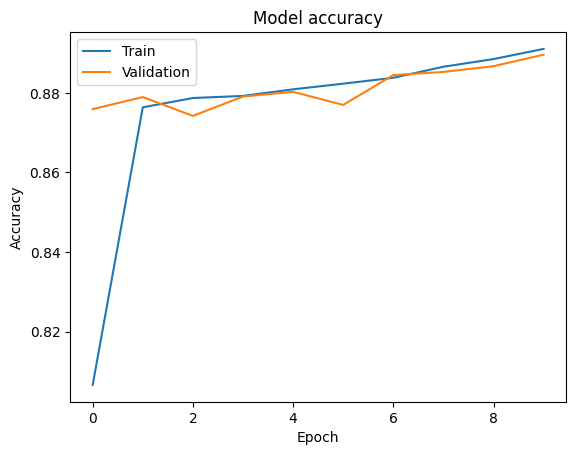

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

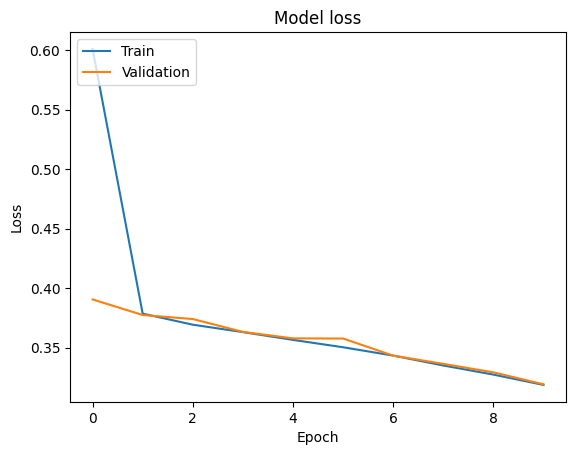

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_seq_x)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_y, y_pred_classes)
print(cm)

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
[[1647   78  114   61]
 [  20 1853   14   13]
 [  64   26 1612  198]
 [  62   28  161 1649]]


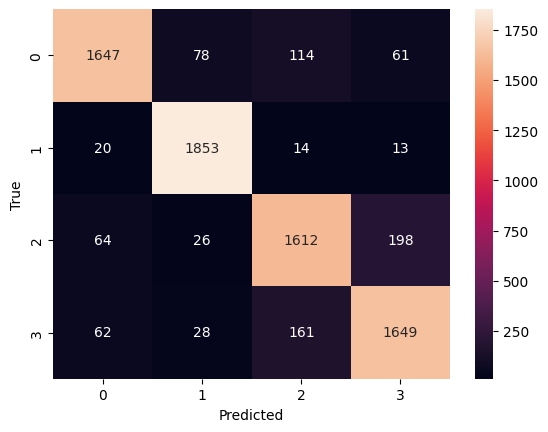

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers

vocab_size = len(word_index)+1

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))
model.build((None, max_length)) # build the Embedding to inilizices the weight
model.add(layers.Conv1D(filters=256, kernel_size=7, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))  # Dropout after Conv1D
model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))  # Dropout after Conv1D
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_seq_x,
                    train_y,
                    epochs=10,
                    batch_size=128,
                    validation_data=(test_seq_x, test_y),
                    verbose=1)
results = model.evaluate(test_seq_x, test_y)

print(results)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 256, 50)             │       3,516,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 250, 256)            │          89,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 250, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 250, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 246, 128)            │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 246, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 246, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_5           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,774,392 (14.40 MB)

 Trainable params: 3,773,624 (14.40 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1396s 1s/step - acc: 0.8729 - loss: 0.3886 - val_acc: 0.9126 - val_loss: 0.2511
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1408s 1s/step - acc: 0.9280 - loss: 0.2106 - val_acc: 0.9214 - val_loss: 0.2306
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1388s 1s/step - acc: 0.9457 - loss: 0.1577 - val_acc: 0.9172 - val_loss: 0.2418
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1373s 1s/step - acc: 0.9599 - loss: 0.1152 - val_acc: 0.9205 - val_loss: 0.2397
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1367s 1s/step - acc: 0.9709 - loss: 0.0833 - val_acc: 0.9216 - val_loss: 0.2785
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1361s 1s/step - acc: 0.9775 - loss: 0.0636 - val_acc: 0.9136 - val_loss: 0.2960
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1361s 1s/step - acc: 0.9818 - loss: 0.0503 - val_acc: 0.9192 - val_loss: 0.3390
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1393s 1s/step - acc: 0.9863 - loss: 0.0392 - val_acc: 0.9164 - val_loss: 0.3554
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 

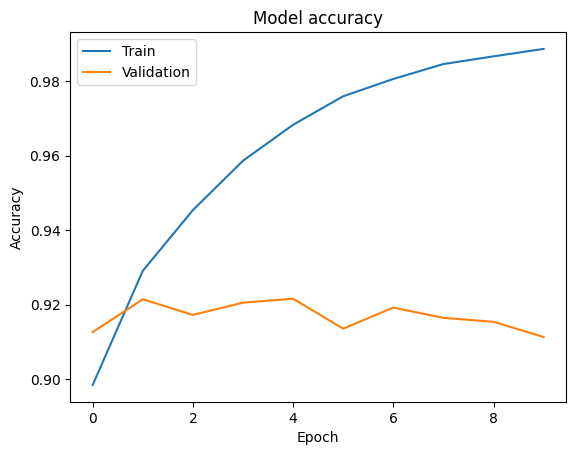

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

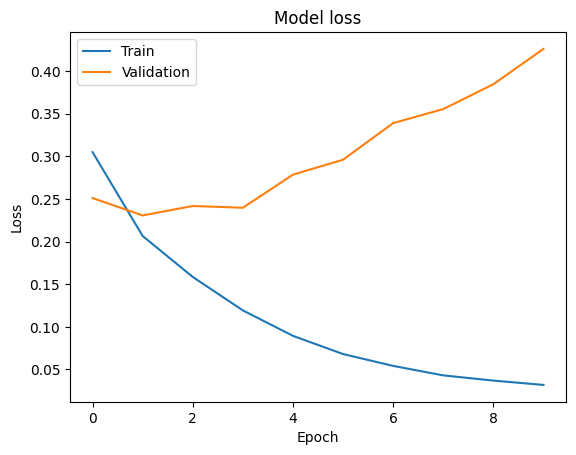

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_seq_x)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_y, y_pred_classes)
print(cm)

238/238 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step
[[1756   21   72   51]
 [  42 1823   29    6]
 [  71   10 1686  133]
 [  56   13  170 1661]]


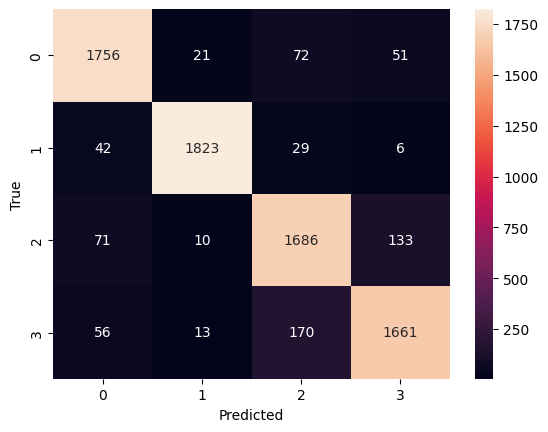

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()